## MIDS W261 HW 6

Marjorie Sayer

Date: 2/25/2016

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### HW6.0. 

In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

**Answer**
Mathematical optimization is the search for a "best value" option out of a set of alternatives. Most frequently, the possible values are modeled as a function of the alternatives. The function is called the **objective function**. if the alternatives are the variable x, the objective function f maps x to value: 

`f: x -> value` 

If `value` is a real number, the optimization problem becomes the search for a maximum or minium value of f (an extremum of f). There are numerous mathematical techniques (calculus, linear programming, calculus of variations) to find extrema. 

I have worked on text classification with logistic regression. This project is not yet deployed in the real world but reached about 74% accuracy so far. The idea was to label sentences as referring to engineering labels: Bugs, Tasks, or Features. The idea is to model the `p(label|sentence)` as a sigmoid function of the words in the sentence. If there are three words w1, w2, and w3, then: 

probability(Bugs | w1, w2, w3) = 1/(1 + exp(-z)) = sigmoid(z)

where z = a<sub>0</sub> + a<sub>1</sub>w1 + a<sub>2</sub>w2. 

And the optimization problem is: to find values of the parameters a<sub>0</sub>, a<sub>1</sub>, and a<sub>2</sub> that minimize the objective function which is the log likelihood function. 


### HW6.1 

**For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC)?**

If the objective function is differentiable, the FOC is that the derivative is zero. 

**What are the second order optimality conditions (SOC)? Give a mathematical defintion.**

If the objective function is twice differentiable, the SOC is that the second derivative is strictly positive (for a minimum) or strictly negative (for a maximum). 

**For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC)?** 

If the objective function is differentiable, the FOC is that all first order partial derivatives are zero. 

**What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?**

The Hessian matrix is the matrix of partial derivatives. If for example the objective function has two arguments x and y, the Hessian matrix has the following coordinates: 

f<sub>xx</sub>(x,y)    f<sub>xy</sub>(x,y)

f<sub>yx</sub>(x,y)    f<sub>yy</sub>(x,y) 


Also in python, plot the univariate function 
X<sup>3</sup> -12x<sup>2</sup>-6 defined over the real  domain -6 to +6. 

Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.


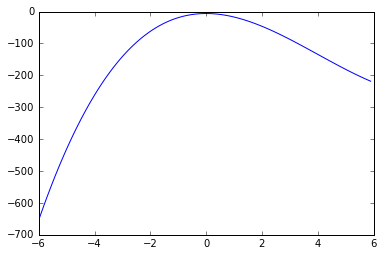

In [2]:
x = np.arange(-6, 6, 0.1);
y = x**3 - 12*x**2 -6
plt.plot(x, y)

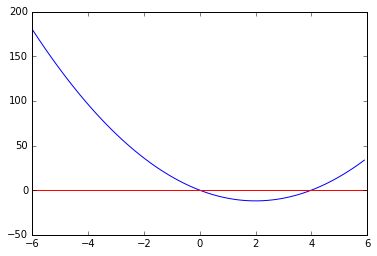

In [3]:
y_prime = 3*x**2 - 12*x
plt.plot(x, y_prime)
plt.axhline(y=0.0, xmin=-5.9, xmax=5.9, linewidth=1, color = 'red')

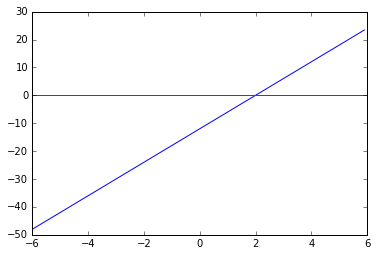

In [4]:
y_doubleprime = 6*x - 12
plt.plot(x, y_doubleprime)
plt.axhline(y=0.0, xmin=-5.9, xmax=5.9, linewidth=1, color = 'red')

### HW6.2

Taking x=1 as the first approximation(xt1) of a root of x<sup>3</sup> + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)

**Solution**
The first derivative f' of the function, and the values of f and f' at xt1 are: 

`f'(x) =` 3x<sup>2</sup> + 2

`f(x) = -1`

`f'(x) = 5`

By Newton-Raphson, the second approximation is `xt2 = xt1 - f(x)/f'(x)`

`xt2 = 1 - (-1)/5 = 1.2`

### HW6.3 Convex optimization 
What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

**Answer**
An optimization problem is convex if the objective function is convex and the domain of optimization is a convex set. 

The FOC for convext optimization, if the function is differentiable, is that all first order derivatives are zero. There is no necessary second order condition. By convexity of f, if it is twice differentiable, its Hessian is either positive definite or negative definite. 

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convex** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

### HW 6.4

The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:


$F(a_0, a_1,...,a_n) = \frac{1}{2} \sum_{i=1}^m weight_i (W X_i - y_i)^2 $


Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model:

$W = (a_0, a_1, ..., a_n)$

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

Assumptions: You can see from the above that I'm assuming that the vectors $X_i$ and $y_i$ are vectors in $R^n$. The number of training examples is m. Correspondingly, there are m weights.

The gradient is the vector whose components are the first partial derivatives of F with respect to the parameters $a_i$. 

**Note:** we represent the vector $X^i$ as $(x_0^i, x_1^i, ..., x_n^i)$ where $x_0^i = 1$ for all i. **n** is the dimension of the feature space. 

$\frac{\partial F}{\partial a_j} = \frac{1}{2} * \sum_{i=1}^m weight_i * \frac{\partial }{\partial a_j} (a_0 x_0^i + ... + a_n x_n^i - y_i)^2)$

$\frac{\partial F}{\partial a_j} = \frac{1}{2} * \sum_{i=1}^m weight_i * 2 * (a_0 x_0^i + ... + a_n x_n^i - y_i) * x_j^i$

$\frac{\partial F}{\partial a_j} = \sum_{i=1}^m weight_i * (a_0 x_0^i + ... + a_n x_n^i - y_i) * x_j^i$

$\frac{\partial F}{\partial a_j} = \sum_{i=1}^m weight_i * (W X - y_i)*x_j^i$



### HW 6.5

Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

HW6.5.1 (OPTIONAL)
Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

In [5]:
import numpy as np
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x) #notice that the order is inverted! This means data has y,x.
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [36]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import numpy as np


# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('./weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(','))) # D[0] is y-coord, D[1] is x-coord.
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        if D[1] != 0:
            wt = 1.0 / np.abs(D[1])
        # Update parial gradient vector with gradient from current example
        self.partial_Gradient =  [self.partial_Gradient[0]+ wt*(D[0] - y_hat), \
                                  self.partial_Gradient[1]+ wt*(D[0]-y_hat)*D[1]]
        self.partial_count = self.partial_count + 1
        
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [MRStep(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
!chmod a+x MrJobBatchGDUpdate_LinearRegression.py

In [39]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression
import numpy as np

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('./weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv', 
                                                   '--file', './weights.txt',
                                                  '--strict-protocols'])
# Update centroids iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('./weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights\n"
print weights

iteration =0  weights = [-0.8140081   1.69787121]
iteration =1  weights = [-1.43678986  1.6280326 ]
iteration =2  weights = [-1.9279771   1.56518207]
iteration =3  weights = [-2.3153759   1.50862048]
iteration =4  weights = [-2.62091689  1.4577186 ]
iteration =5  weights = [-2.86189673  1.41191016]
iteration =6  weights = [-3.05195726  1.37068552]
iteration =7  weights = [-3.2018578   1.33358604]
iteration =8  weights = [-3.3200842   1.30019895]
iteration =9  weights = [-3.41332925  1.27015279]
iteration =10  weights = [-3.48687152  1.24311326]
iteration =11  weights = [-3.54487425  1.21877951]
iteration =12  weights = [-3.59062095  1.19688077]
iteration =13  weights = [-3.62670134  1.17717341]
iteration =14  weights = [-3.65515792  1.15943812]
iteration =15  weights = [-3.6776016   1.14347759]
iteration =16  weights = [-3.69530293  1.1291142 ]
iteration =17  weights = [-3.70926395  1.11618814]
iteration =18  weights = [-3.72027501  1.10455559]
iteration =19  weights = [-3.72895943  1.

In [ ]:
import math
np.abs(-6)